In [2]:
import numpy as np
import pandas as pd
import statistics
from IPython.display import Image, display, clear_output

from utils.statistics import cov

def dev_from_med_pc(arr: list, el: int):
       return (el - np.median(arr)) / el * 100


def dev_from_med(arr: list, el: int):
       return (el - np.median(arr))

def zscore(arr: list, el: int):
       return (el - np.mean(arr)) / np.std(arr)


def preproc_tsv(path):
       df = pd.read_csv(path, delimiter="\t", header=0, index_col=0)
       selected_transcripts = df["selected_transcripts"].str.split(",").map(lambda x: list(map(str.strip, x)))
       for hog, li in selected_transcripts.items():
              idx = li.index(df.loc[hog, "worst_transcript"])
              df.loc[hog, "prot_lengt_dev_pc"] = dev_from_med_pc(list(map(int, df.loc[hog, "protein_lengths"].split(","))), int(df.loc[hog, "protein_lengths"].split(",")[idx]))
              df.loc[hog, "exon_count_dev"] = dev_from_med(list(map(int, df.loc[hog, "exon_counts"].split(","))), int(df.loc[hog, "exon_counts"].split(",")[idx]))
              df.loc[hog, "prot_lengt_cov"] = cov(list(map(int, df.loc[hog, "protein_lengths"].split(","))))
              df.loc[hog, "exon_count_cov"] = cov(list(map(int, df.loc[hog, "exon_counts"].split(","))))
              df.loc[hog, "prot_lengt_zscore"] = zscore(list(map(int, df.loc[hog, "protein_lengths"].split(","))), int(df.loc[hog, "protein_lengths"].split(",")[idx]))
       return df

In [3]:
df1 = preproc_tsv("data/schistosome_orthogroups/Results_Jul22/table_2024_10_09_16_28_50.tsv")
df1.head()

/tmp/ipykernel_108300/1258931625.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return (el - np.median(arr)) / el * 100
/tmp/ipykernel_108300/1258931625.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return (el - np.median(arr)) / el * 100
/tmp/ipykernel_108300/1258931625.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return (el - np.median(arr)) / el * 100
/tmp/ipykernel_108300/1258931625.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return (el - np.median(arr)) / el * 100
/tmp/ipykernel_108300/1258931625.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return (el - np.median(arr)) / el * 100
/tmp/ipykernel_108300/1258931625.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return (el - np.median(arr)) / el * 100
/tmp/ipykernel_108300/1258931625.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return (el - np.median(arr)) / el * 100
/tmp/ipykerne

,selected_transcripts,exon_counts,protein_lengths,gene_counts,transcript_counts,worst_transcript,worst_pair,blast_pident,align_pident,prot_lengt_dev_pc,exon_count_dev,prot_lengt_cov,exon_count_cov,prot_lengt_zscore
HOG,,,,,,,,,,,,,,
N0.HOG0000000,"SBOV2_26620.1, SCUR1_89610.1, SGUI1_74730.1, S...","1, 1, 1, 1, 1, 1, 1, 0, 11","1006, 525, 210, 579, 90, 1006, 127, 0, 317","13, 30, 40, 42, 21, 18, 2, 7, 1","13, 30, 40, 42, 21, 18, 2, 7, 1",EWB00_002233,"SRDH2_30130.1, EWB00_002233",73.9,4.572565,0.000000,10.0,0.883339,1.695582,-0.313250
N0.HOG0004882,"SBOV2_71970.1, SCUR1_71990.1, SGUI1_73020.1, S...","7, 9, 7, 7, 7, 9, 7, 0, 7","364, 401, 361, 370, 364, 412, 358, 0, 358","1, 1, 1, 1, 1, 1, 1, 1, 1","1, 1, 1, 1, 1, 1, 1, 1, 1",SRDH2_72900.1,"SRDH2_72900.1, EWB00_004970.2",72.5,85.679612,11.650485,2.0,0.379611,0.396863,0.673271
N0.HOG0004881,"SBOV2_71960.3, SCUR1_71980.1, SGUI1_73010.1, S...","7, 7, 7, 7, 7, 7, 7, 0, 5","357, 326, 320, 334, 351, 320, 321, 0, 287","1, 1, 1, 1, 1, 1, 1, 1, 1","1, 1, 1, 1, 1, 1, 1, 1, 1",EWB00_004971.1,"SBOV2_71960.3, EWB00_004971.1",57.3,63.025210,-11.846690,-2.0,0.381377,0.390868,-0.035083
N0.HOG0004880,"SBOV2_71950.1, SCUR1_71970.1, SGUI1_73000.1, S...","3, 3, 3, 3, 3, 3, 3, 0, 3","572, 574, 575, 568, 573, 591, 583, 0, 580","1, 1, 1, 1, 1, 1, 1, 1, 1","1, 1, 1, 1, 1, 1, 1, 1, 1",SRDH2_72920.1,"SHAE2_77160.1, SRDH2_72920.1",74.1,99.323181,2.876481,0.0,0.375238,0.375000,0.430486
N0.HOG0004879,"SBOV2_71940.1, SCUR1_71960.1, SGUI1_72990.1, S...","13, 13, 13, 13, 13, 13, 13, 0, 8","1032, 1032, 1031, 1032, 1032, 1036, 1036, 0, 392","1, 1, 1, 1, 1, 1, 1, 1, 1","1, 1, 1, 1, 1, 1, 1, 1, 1",EWB00_004973,"SBOV2_71940.1, EWB00_004973",74.0,39.437984,-163.265306,-5.0,0.450857,0.404009,-1.263763


In [4]:
candidates = df1[(df1["align_pident"] < 50) & (df1["blast_pident"] > 95)]
sman_candidates = candidates[candidates["worst_transcript"].str.startswith("Smp")]
shae_candidates = candidates[candidates["worst_transcript"].str.startswith("SHAE2")]


In [15]:
with open("data/schistosome_orthogroups/shae_candidates.txt", "w") as f:
    f.write("\n".join(shae_candidates.index.to_list()))

The impact of filtering for lower align_pident and 95%+ blast_pident is that we see greater protein length deviation for the "problem" orthologue, ~~but no impact on exon count deviation~~. This makes sense because if there is lower identity in global alignment between any two sequences, then it stands to reason that their protein lengths will be different.

In [7]:
print(candidates["prot_lengt_dev_pc"].abs().mean())
print(df1["prot_lengt_dev_pc"].abs().mean())
print("---")
print(candidates["exon_count_dev"].abs().mean())
print(df1["exon_count_dev"].abs().mean())


inf
inf
---
7.455357142857143
2.3164309359012942


In [57]:
df1[(df1["align_pident"] < 50) & (df1["blast_pident"] > 95)].shape
# df1.shape

candidates[(candidates["prot_lengt_zscore"] < -2) ].sort_values("prot_lengt_dev_pc", ascending=False).shape#.hist(["prot_lengt_dev_pc", "exon_count_dev"])
# candidates[candidates["zscore"] > 2.5].shape

(188, 14)

N0.HOG0002604
SHAE2_102780.1 - 21.0 - 100.0
SBOV2_34110.1, SHAE2_102780.1
prot length deviation: -376%
exon count deviation: -1


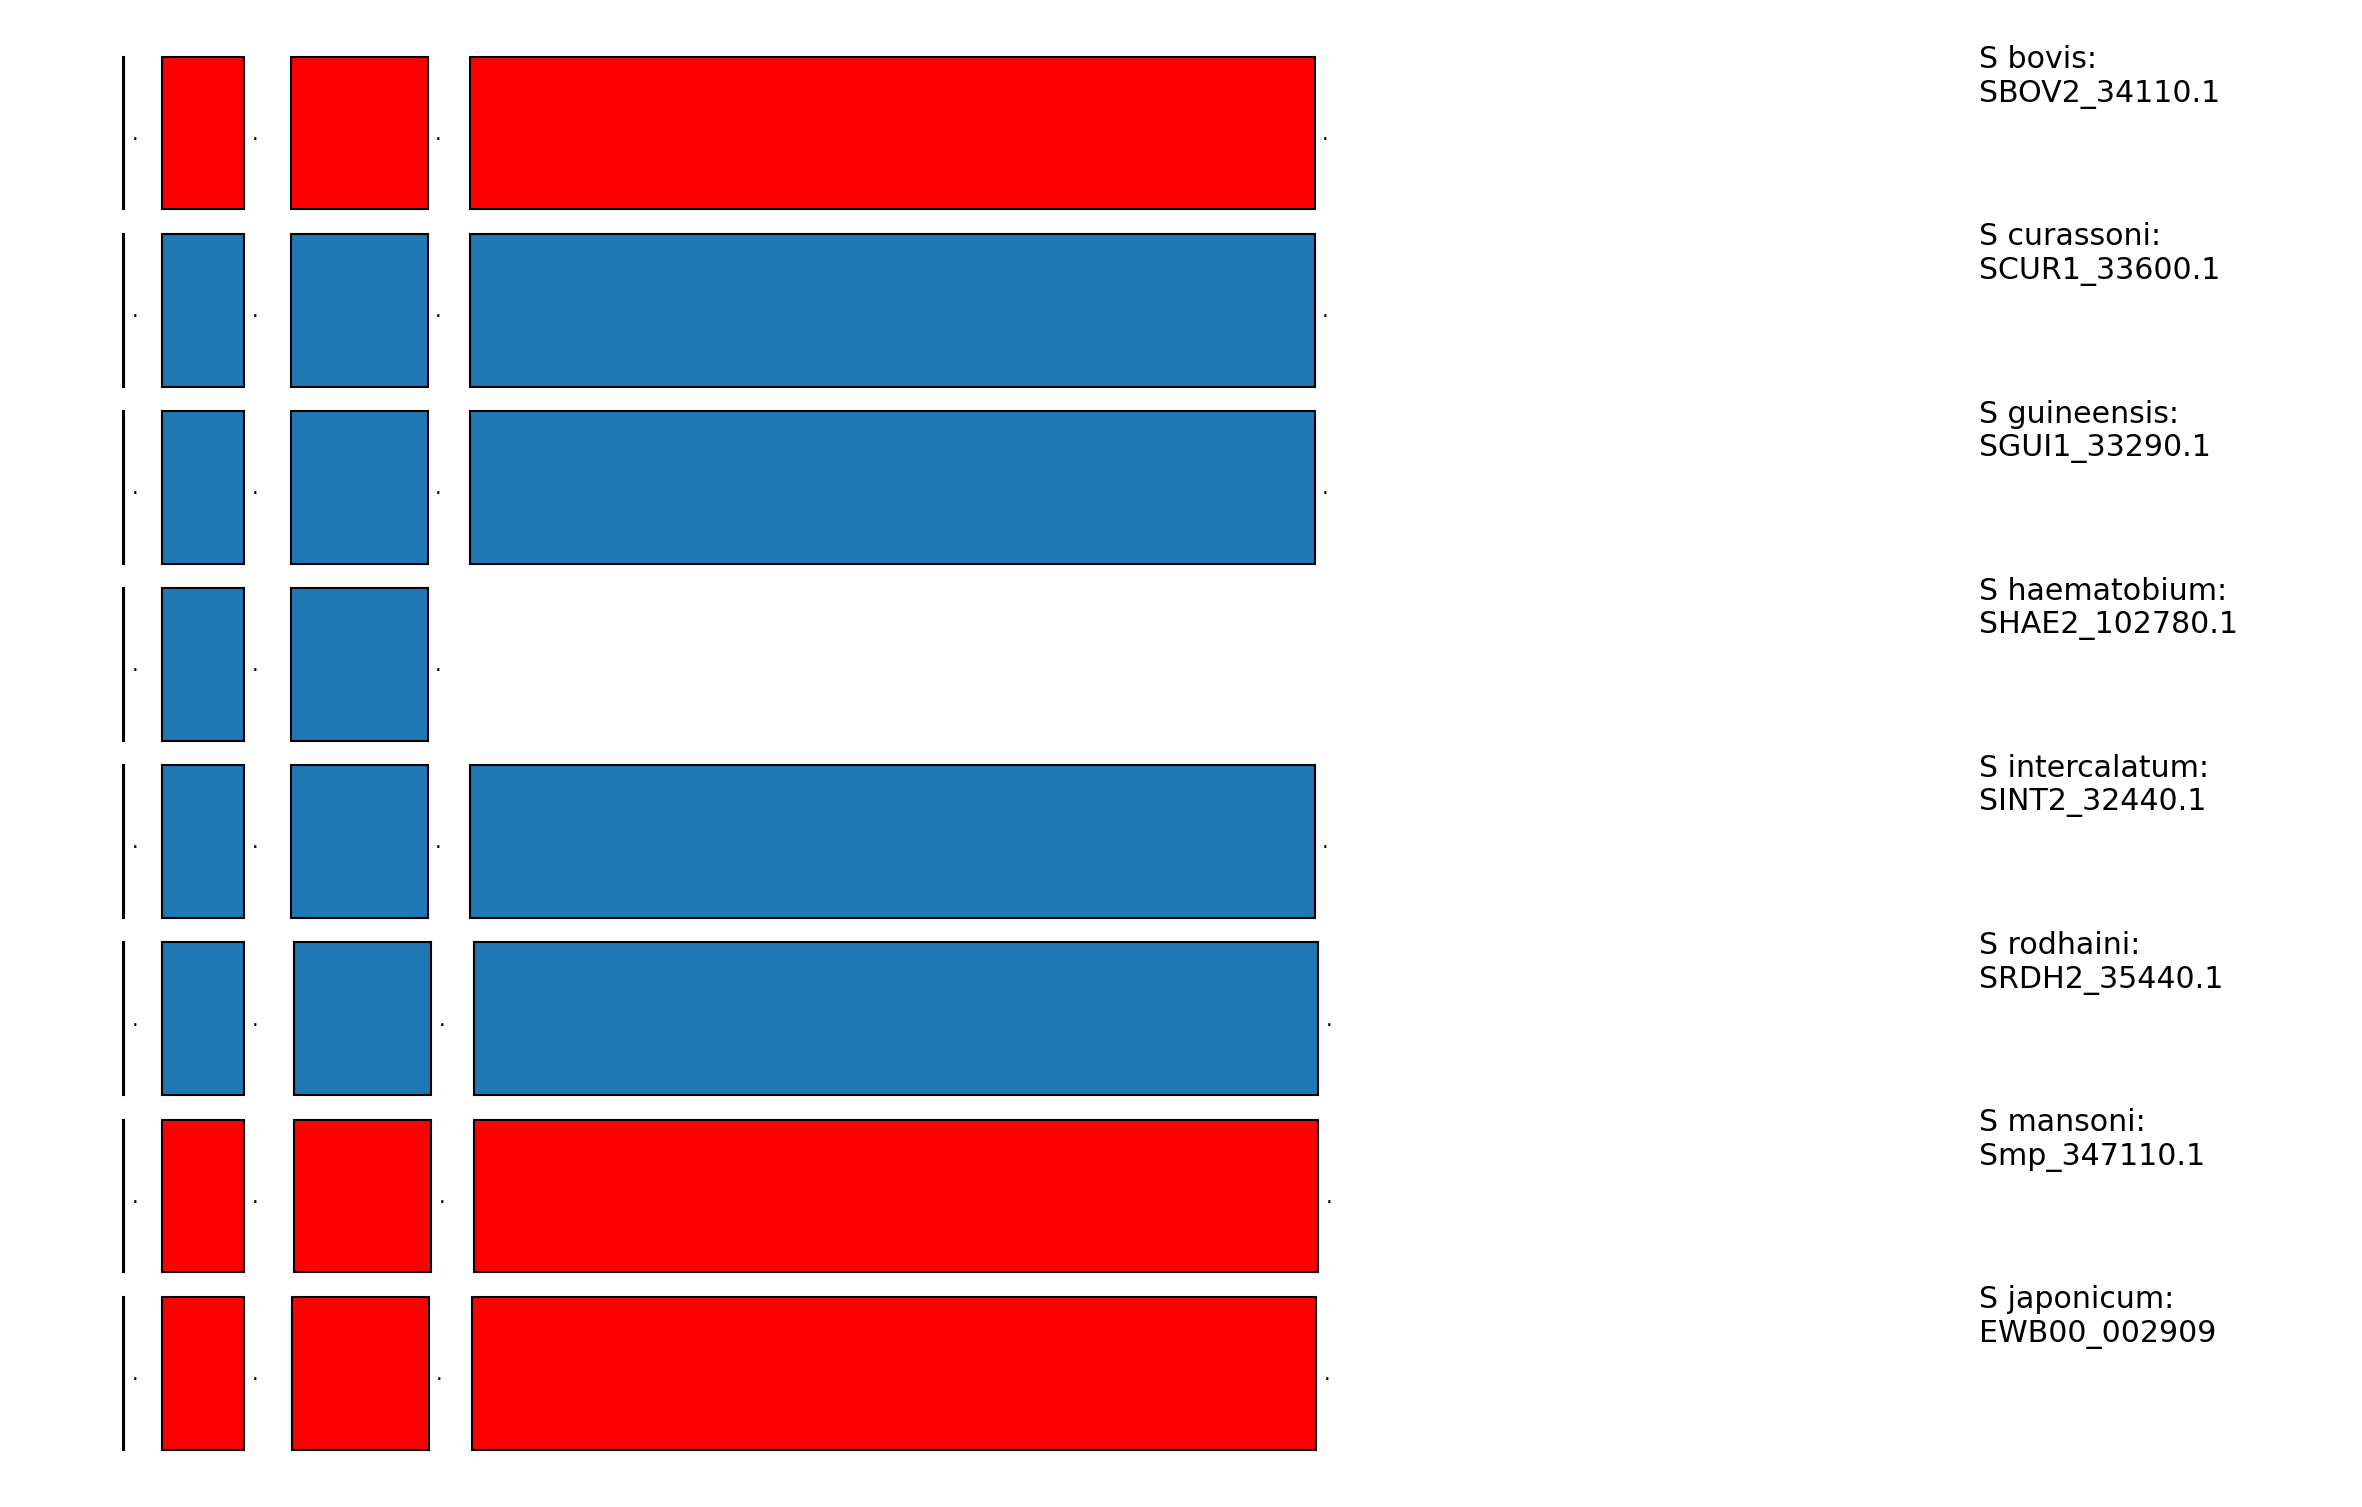

In [23]:
for idx, row in shae_candidates.iterrows():
    clear_output(wait=False)
    hog = row.name
    print(hog)
    print(" - ".join((row["worst_transcript"], str(row["align_pident"]), str(row["blast_pident"]))))
    print(row["worst_pair"])
    print("prot length deviation: " + "%+d" % round(row["prot_lengt_dev_pc"]) + "%")
    print("exon count deviation: " + "%+d" % row["exon_count_dev"])
    display(Image(f"plots/Results_Jul22/{hog}.png", width=600))
    print()

In [22]:
with open("data/schistosome_orthogroups/sman_candidate_transcript_ids.txt", "w") as f:
    f.write("\n".join(sman_candidates["worst_transcript"].to_list()))

/tmp/ipykernel_117176/665755333.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["pident_diff"] = (test_df["blast_pident"] - test_df["align_pident"]).abs()


Text(0.5, 1.0, 'r = 0.76')

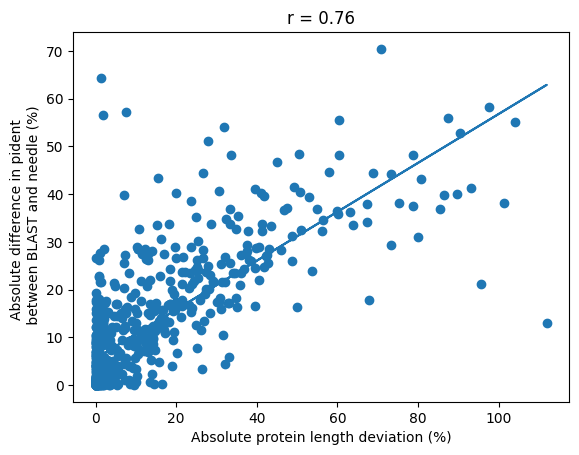

In [85]:
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
# import numpy.ma as ma

test_df = df1[(~df1["align_pident"].isna()) & (~df1["blast_pident"].isna())]
# test_df = candidates
test_df["pident_diff"] = (test_df["blast_pident"] - test_df["align_pident"]).abs()

x = test_df["prot_lengt_dev_pc"].abs().round(2)
y = test_df["pident_diff"].round(2)
coeff = np.corrcoef(x, y)
# coeff = ma.corrcoef(ma.masked_invalid(x), ma.masked_invalid(y))
b, m = polyfit(x, y, 1)
plt.scatter(x=x, y=y)
plt.plot(x, b + m * x, '-')
plt.xlabel("Absolute protein length deviation (%)")
plt.ylabel("Absolute difference in pident \n between BLAST and needle (%)")
plt.title(f"r = {round(coeff[1][0], 2)}")